# Data Science 100 - Group Project (Individual Portion)

GitHub: 

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(lubridate)
library(RColorBrewer)
options(repr.matrix.max.rows = 8)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

### (1) - Data Description

In [2]:
#read in players data
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


This is the *players* dataset, which includes 196 rows, and 7 variables. These 7 variables include:

- **experience** (chr) &rarr; The expereince level of a player (Pro, Veteran, Beginner, Amateur, Regular)

- **subscribe** (lgl) &rarr; Whether a player is subscribed or not (TRUE/FALSE) 

- **hasedEmail** (chr) &rarr; the email each player uses 

- **played_hours** (dbl) &rarr; The number of hours played by each player 

- **name** (chr) &rarr; Each player's name 

- **gender** (chr) &rarr; Player's gender (Male, Female, Non-binary, Agender, Two-Spirited, Prefer not to say, Other) 

- **Age** (dbl) &rarr; Player's age

In [29]:
#read in sessions data
sessions <- read_csv("sessions.csv")
sessions

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
⋮,⋮,⋮,⋮,⋮
7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,01/07/2024 04:08,01/07/2024 04:19,1.71981e+12,1.71981e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


This is the *sessions* dataset, which includes 1535 rows, and 5 variables. These 5 variables include:

- **hasedEmail** (chr) &rarr; the email each player uses 

- **start_time** (chr) &rarr; Start of playing time/session

- **end_time** (chr) &rarr; End of playing time/session

- **original_start_time** (dbl) &rarr; Start of playing session (in milliseconds)

- **original_end_time** (dbl) &rarr; End of playing session (in milliseconds)

In [55]:
#determine number of sessions and avg_session_time for each player
sessions_total_time <- sessions |>
                                mutate(start_time = as_datetime(start_time),
                                        end_time = as_datetime(end_time),
                                      duration = as.numeric(difftime(end_time, start_time, units = "mins"))) |>
                                group_by(hashedEmail) |>
                                summarise(num_sessions = n(),
                                          avg_session_duration = abs(mean(duration, na.rm = TRUE)))
sessions_total_time

hashedEmail,num_sessions,avg_session_duration
<chr>,<int>,<dbl>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2,2.627889e+05
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1,5.000000e-01
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1,1.833333e-01
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,13,5.358974e-01
⋮,⋮,⋮
fcab03c6d3079521e7f9665caed0f31fe3dae6b5ccb86e6cb58747a43aa8789f,1,1.333333
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,310,6791.173925
fe218a05c6c3fc6326f4f151e8cb75a2a9fa29e22b110d4c311fb58fb211f471,1,0.150000
fef4e1bed8c3f6dcd7bcd39ab21bd402386155b2ff8c8e53683e1d2793bf1ed1,1,1.200000


In [56]:
#combine the 2 datasets
players_sessions <- full_join(players, sessions_total_time)
players_sessions

Joining with `by = join_by(hashedEmail)`


experience,subscribe,hashedEmail,played_hours,name,gender,Age,num_sessions,avg_session_duration
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,4.854432e+05
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,1.416667e+00
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,8.333333e-02
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1,8.333333e-01
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Veteran,FALSE,71453e425f07d10da4fa2b349c83e73ccdf0fb3312f778b35c5802c3292c87bd,0.3,Pascal,Male,22,1,0.35000000
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57,1,0.08333333
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17,6,0.49722222
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA,1,0.25000000


### (2) - Questions

The broad question I will adress is **"What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?."** This question is interested in whether players will subscribe or not, so I can try to determine the characteristic(s) of players who currently have the most subscriptions. So I will specifically address the question, **"Does avg_session-duration, played_hours, and experience predict subscription in *players* dataset?"**. 

I will address my specific question by selecting the "played_hours", "avg_session_duration", and "experience" variables.

### (3) - Data Visualization

In [52]:
#select the required variables
players_sessions_specific <- players_sessions |>
                   select(experience, played_hours, subscribe, avg_session_duration)
players_sessions_specific

experience,played_hours,subscribe,avg_session_duration
<chr>,<dbl>,<lgl>,<dbl>
Pro,30.3,TRUE,8.090720e+03
Veteran,3.8,TRUE,2.361111e-02
Veteran,0.0,FALSE,1.388889e-03
Amateur,0.7,TRUE,1.388889e-02
⋮,⋮,⋮,⋮
Veteran,0.3,FALSE,0.005833333
Amateur,0.0,FALSE,0.001388889
Amateur,2.3,FALSE,0.008287037
Pro,0.2,TRUE,0.004166667


Above, we wrangled the data to include only the variables we are interested in. Additionally, our data is tidy because each column is one variable, each row is one observation, and each cell is a single value. 

In [57]:
#calculate the mean of the dbl variables (Age, played_hours, original_start_time, original_end_time, avg_session_duration)
sessions_mean <- sessions |>
                summarize(original_start_time_mean = mean(original_start_time, na.rm = TRUE), original_end_time_mean = mean(original_end_time, na.rm = TRUE))
sessions_mean

players_sessions_mean <- players_sessions |>
                        summarize(age_mean = mean(Age, na.rm = TRUE), played_hours_mean = mean(played_hours, na.rm = TRUE), avg_session_duration_mean = mean(avg_session_duration, na.rm = TRUE))
players_sessions_mean

original_start_time_mean,original_end_time_mean
<dbl>,<dbl>
1.719201e+12,1.719196e+12


age_mean,played_hours_mean,avg_session_duration_mean
<dbl>,<dbl>,<dbl>
21.13918,5.845918,16954.06


From the above wrangling, we conclude that the average age of a player is 21, the avergae playing time is 5.85 hours, and the average_session_duration is 16954.06 seconds, which is about 4.7 hours. 

Warning message in scale_y_log10(labels = comma):
“log-10 transformation introduced infinite values.”


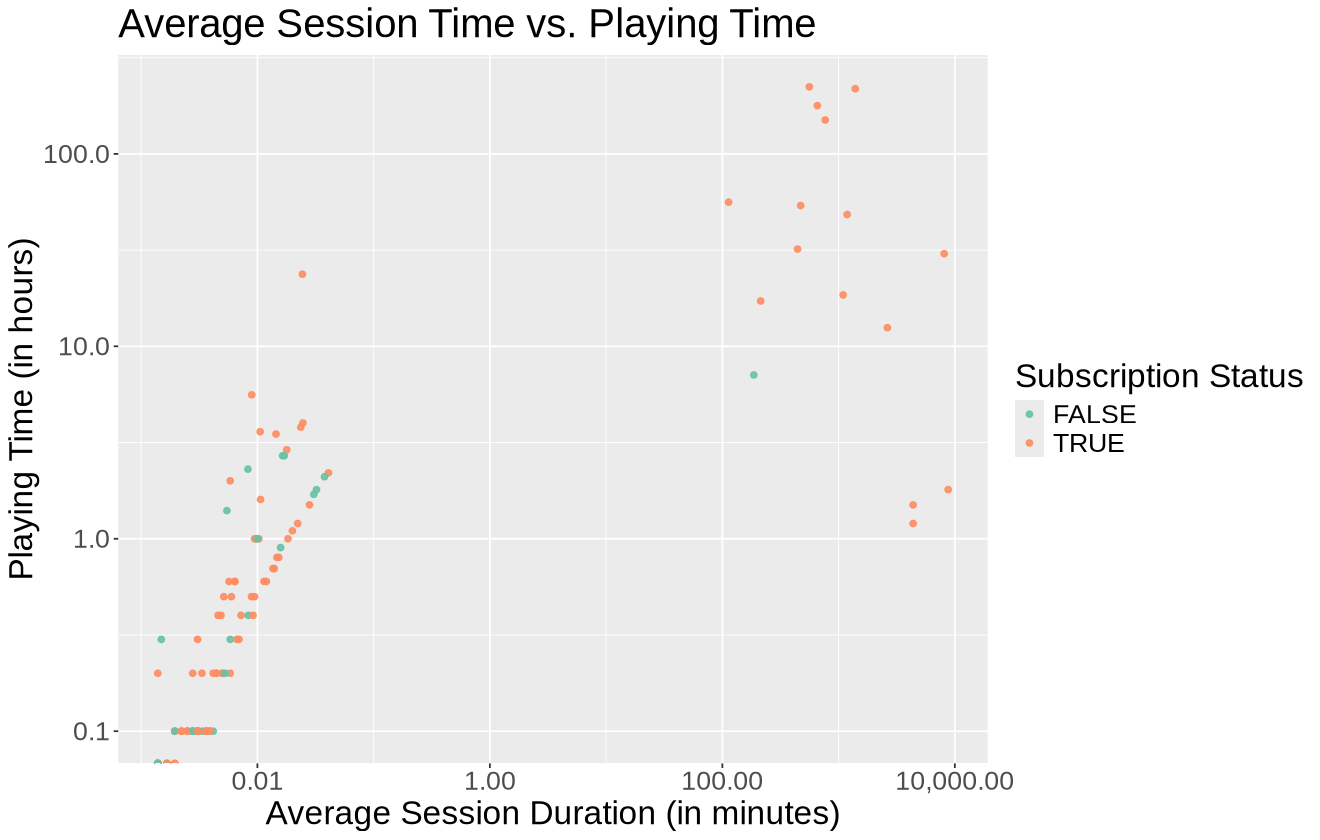

In [61]:
options(repr.plot.width = 11, repr.plot.length = 9)

#plot avg_session_duration vs. played_hours (scaled y-axis)
age_vs_played_hours_plot_scale <- players_sessions |>
                                ggplot(aes(x = (avg_session_duration/60), y = played_hours, color = subscribe))+
                                geom_point(alpha = 0.9, na.rm = TRUE)+
                                labs(x = "Average Session Duration (in minutes)", y = "Playing Time (in hours)", color = "Subscription Status", title = "Average Session Time vs. Playing Time")+
                                scale_x_log10(labels = comma)+
                                scale_y_log10(labels = comma)+
                                theme(text = element_text(size = 20))+
                                scale_color_brewer(palette = "Set2")
age_vs_played_hours_plot_scale

From the above plot we see that there is a positive relationship between **played_hours** and **avg_session_duration**. That is, as **avg_session_duration** increases, so does **played_hours**. Note that, while there is a big "gap" in the plot, it is because some points are "outliers" in comparison to the majority of the data. 

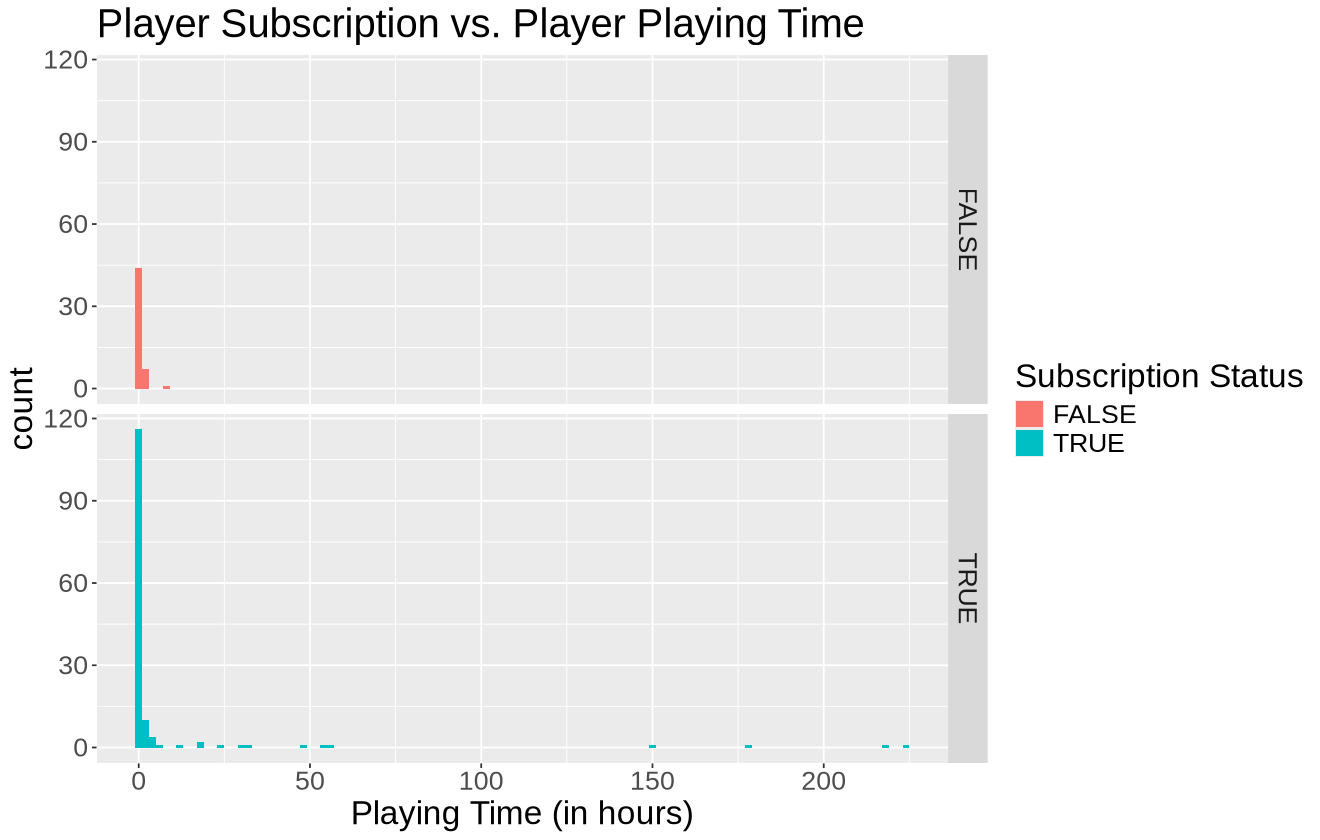

In [92]:
#make a histogram to see subscription vs. played_hours
options(repr.plot.width = 11, repr.plot.length = 15)

played_hours_vs_subscription_histogram <- players_specific |>
                            ggplot(aes(x = played_hours, fill = as.factor(subscribe)))+
                            geom_histogram(binwidth = 2, position = "identity")+
                            facet_grid(rows = vars(subscribe))+
                            labs(x = "Playing Time (in hours)", title = "Player Subscription vs. Player Playing Time", fill = "Subscription Status")+
                            theme(text = element_text(size = 20))+
                            scale_color_brewer(palette = "Set2")

played_hours_vs_subscription_histogram

From the above plot we see that there is no direct relationship between **played_hours** and **subscribe**, but we see that most of the players are subscribed. Hence, we can determine how many players are subscribed or not by using filter(). 

In [91]:
players_subscribed <- players_sessions_specific |>
                        filter(subscribe == TRUE)
players_subscribed

players_not_subscribed <- players_sessions_specific |>
                            filter(subscribe == FALSE)
players_not_subscribed

experience,played_hours,subscribe,avg_session_duration
<chr>,<dbl>,<lgl>,<dbl>
Pro,30.3,TRUE,8.090720e+03
Veteran,3.8,TRUE,2.361111e-02
Amateur,0.7,TRUE,1.388889e-02
Regular,0.1,TRUE,2.500000e-03
⋮,⋮,⋮,⋮
Beginner,0.0,TRUE,NA
Amateur,0.0,TRUE,NA
Amateur,0.0,TRUE,NA
Pro,0.2,TRUE,0.004166667


experience,played_hours,subscribe,avg_session_duration
<chr>,<dbl>,<lgl>,<dbl>
Veteran,0.0,FALSE,0.001388889
Amateur,0.0,FALSE,0.001388889
Amateur,0.0,FALSE,NA
Amateur,0.1,FALSE,0.003333333
⋮,⋮,⋮,⋮
Amateur,0.0,FALSE,NA
Veteran,0.3,FALSE,0.005833333
Amateur,0.0,FALSE,0.001388889
Amateur,2.3,FALSE,0.008287037


We see that 144 players are subscribed, and 52 are not subscribed.

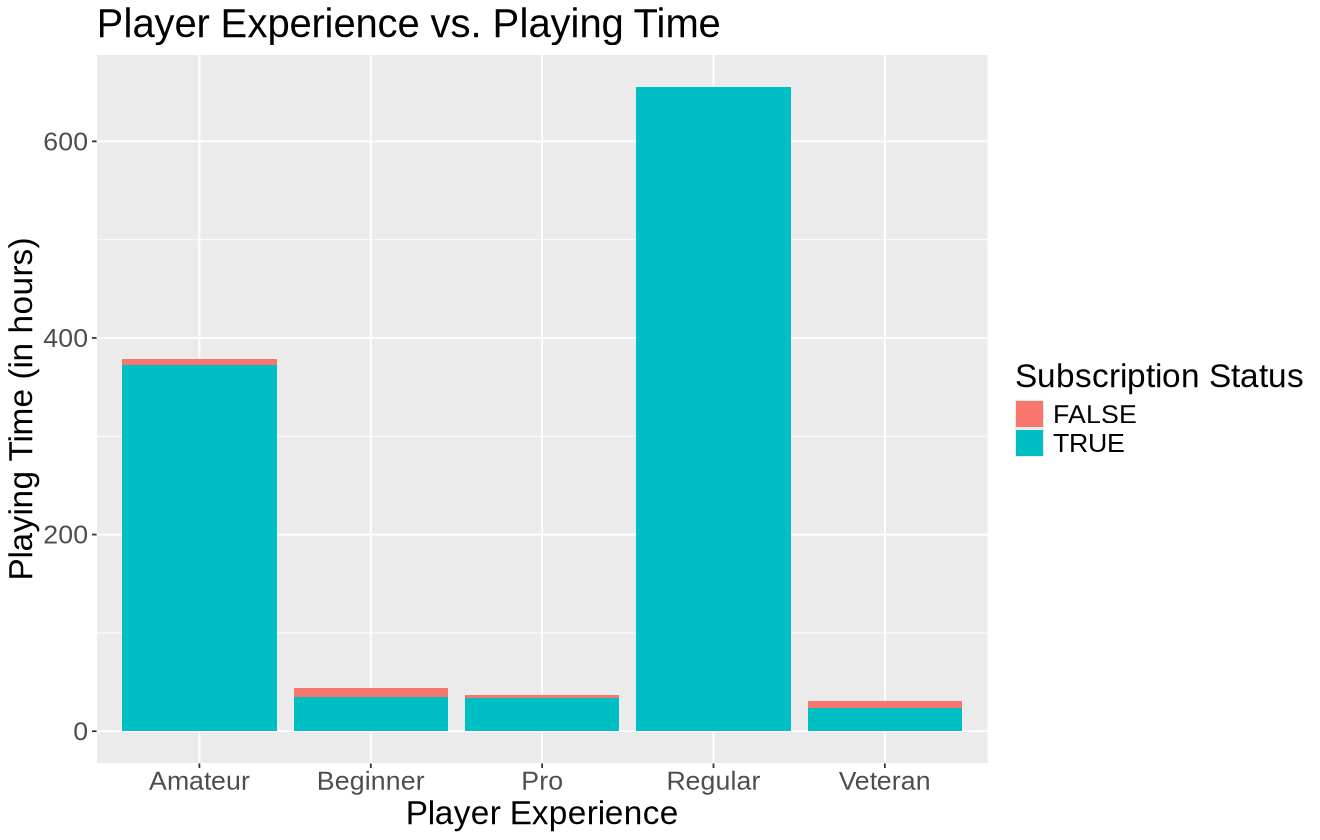

In [93]:
#make bar plot to determine the experiences with most subscriptions and playing time
playing_time_vs_experience_plot <- players_sessions_specific |>
                                    ggplot(aes(x = experience, y = played_hours, fill = as.factor(subscribe)))+
                                            geom_bar(stat = "identity")+
                                            labs(x = "Player Experience", y = "Playing Time (in hours)", fill = "Subscription Status", title = "Player Experience vs. Playing Time")+
                                            theme(text = element_text(size = 20))+
                                            scale_color_brewer(palette = "Paired")
playing_time_vs_experience_plot

From the above plot, we see that Regular, Amateur, and Beginner players have the highest playing time. We also see that all regular players are subscribed, as well as most of the amateur and beginner players. 

In [90]:
#calculate mean played_hours and avg_session_duration for subscribed players (regular, amateur, and beginner experience)
players_subscribed_popular_experience_mean <- players_subscribed |>
                                                filter(experience == "Amateur" | experience == "Beginner" | experience == "Regular") |>
                                                summarize(played_hours_mean = mean(played_hours, na.rm = TRUE), avg_session_duration_mean = mean(avg_session_duration, na.rm = TRUE))
players_subscribed_popular_experience_mean

#calculate mean played_hours and avg_session_duration for subscribed players (veteran, pro)
players_subscribed_not_popular_experience_mean <- players_subscribed |>
                                                filter(experience == "Veteran" | experience == "Pro") |>
                                                summarize(played_hours_mean = mean(played_hours, na.rm = TRUE), avg_session_duration_mean = mean(avg_session_duration, na.rm = TRUE))
players_subscribed_not_popular_experience_mean

played_hours_mean,avg_session_duration_mean
<dbl>,<dbl>
10.51584,359.0518


played_hours_mean,avg_session_duration_mean
<dbl>,<dbl>
1.339535,428.7527


From the above, we see from the subscribed pool of players, beginners, amateurs, and regular experience players have a higher playing time average, while players with pro or veteran experience have a higher session duration average. Thus, we can say that pro and veteran players play frequent small sessions, while beginners, amateurs, and regulars play longer sessions (more overall time).  

### (4) - Methods & Plan

Since I want to predict whether a player will subscribe to the newsletter, I will need to use a classification model, which is appropriate because **subscribe** is a qualitative variable (chr). 


A potential limitation, however, is that "experience" is not a numeric quantity, so we can't use it when making a prediction. However, from our visualizations above, we know that if a player has more small, frequent sessions, then they are probably pros or veterans. On the other hand, if a player has a larger overall playing time, then they are probably beginners, amateurs, or regulars.


| Hours played    | Subscribed | Unsubscribed | Total |
|--------         |  --------  |   --------   | ----- |
|  0              |     58     |     27       |  85   |
|  0.1 - 1        |     56     |      17      |   73  |
|  >1             |     28     |      8       |  36   |

Another limitation is that for played_hours, when we have a total playing time greater than 1 hour, we will have most of the players subscribed, which will make our model not accurate because most of the neighbors it might use will represent subscribed players. This is also the case for playing hours between 0.1-1. 


In conclusion, when using my classification model, I will use hours_played and avg_session_duration as my predictor variables. I will refrain from using experience because it will have bias depending on the overall playing time and avergae session durations of the player who we try to predict subscription possibility for. 

#### Classificaton Process

1. Split data into a testing and training set (using **initial_split**); Training set should have 75% of data (as per standard splitting)

2. Create recipe with **subscribe** as the class and **played_hours, avg_session_duration** as the predictor variables, as well as scale the values

3. Make a model named **knn_spec** using **"kknn"** as engine, and **"classification"** and mode, with a neighbor value of **tune()**

4. Perform cross-validation to determine best k using **vfold** to fold the data 5 time, and then graph k vs. accuracy to select best k (highest accuracy)

5. Use obtained k-value in your **knn_spec** and fit your **testing data** using **workflow, model, and recipe<**